<a href="https://colab.research.google.com/github/2303A52378/Explainable-AI-Lab/blob/main/Ex_ai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Stress Detection from Heart Rate & Sleep Data (Wearables)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import PartialDependenceDisplay
import shap
import lime
import lime.lime_tabular
from pdpbox import pdp, info_plots

# 1. Load dataset
df = pd.read_csv("/content/human_stress_sleep_dataset.csv")

In [ ]:
features = [
    "sleep_hours", "n1_fraction", "n2_fraction", "n3_fraction", "rem_fraction",
    "avg_heart_rate_bpm", "rmssd_hrv_ms", "respiration_rate_bpm",
    "blood_oxygen_percent", "body_temperature_c",
    "snoring_level", "limb_movement_index", "eye_movement_index", "awakenings",
    "subjective_sleep_quality_1_5"
]
X = df[features]
y = df["stress_label"]

In [ ]:
# 3. Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# 5. Predictions
y_pred = clf.predict(X_test)

# 6. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

        High       0.86      0.83      0.85        36
         Low       0.90      0.90      0.90        30
      Medium       0.74      0.76      0.75        34

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



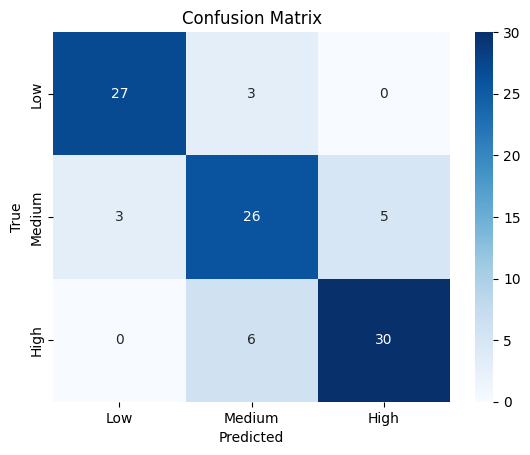

In [ ]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low","Medium","High"], yticklabels=["Low","Medium","High"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

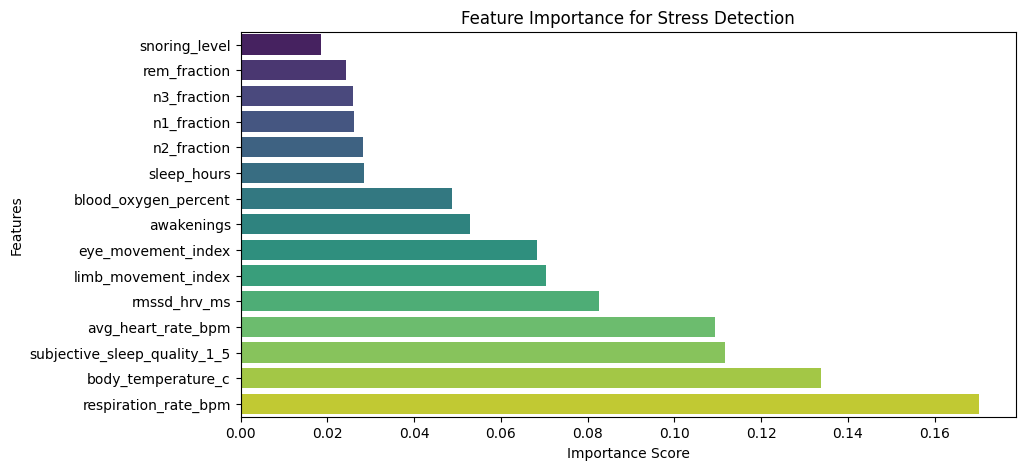

In [ ]:
# 7. Feature Importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=True)

plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=importances.index, hue=importances.index,
            palette="viridis", dodge=False, legend=False)
plt.title("Feature Importance for Stress Detection")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

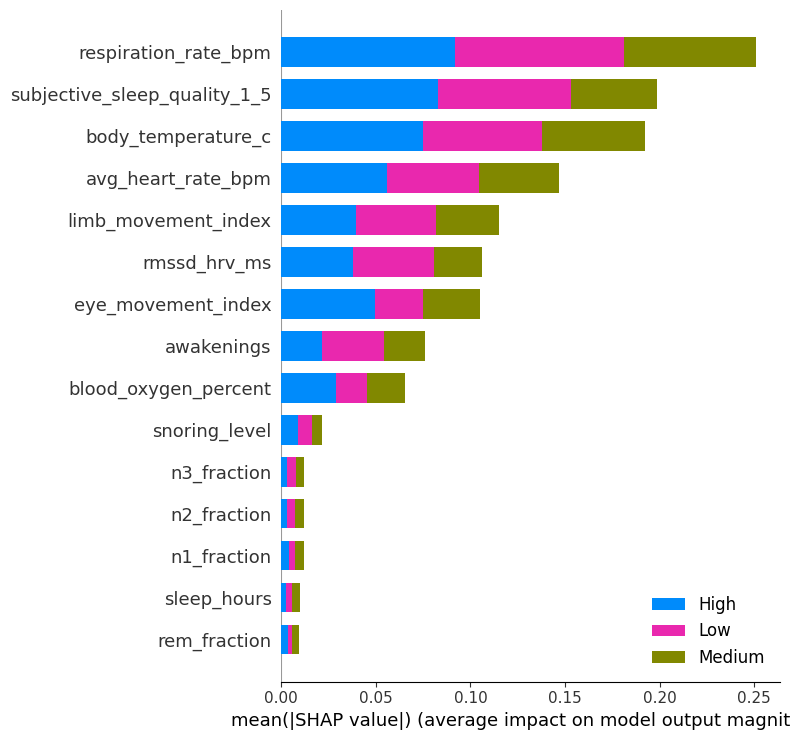

In [ ]:
# 8. SHAP (Shapley Additive Explanations)
explainer_shap = shap.TreeExplainer(clf)
shap_values = explainer_shap.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=clf.classes_)

In [ ]:
# 9. LIME (Local Interpretable Model-agnostic Explanations)
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=features,
    class_names=clf.classes_,
    mode="classification"
)

In [ ]:
# Explain first test instance
i = 0
exp = lime_explainer.explain_instance(X_test.values[i], clf.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)


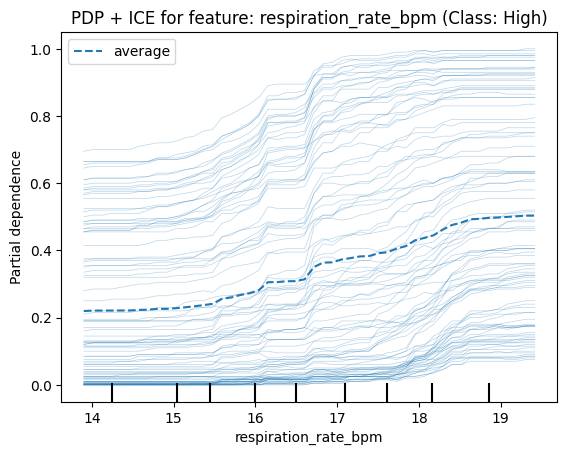

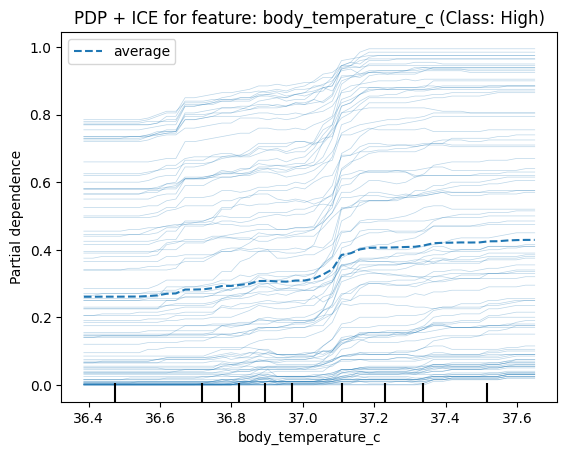

In [ ]:
# 10. PDP + ICE (Partial Dependence + Individual Conditional Expectation)
top_features = importances.sort_values(ascending=False).index[:2]
target_class = "High"  # can be "Low", "Medium", or "High"

for feat in top_features:
    display = PartialDependenceDisplay.from_estimator(
        clf,
        X_test,
        features=[feat],
        kind='both',
        grid_resolution=50,
        target=target_class
    )
    plt.title(f"PDP + ICE for feature: {feat} (Class: {target_class})")
    plt.show()